In [3]:
# Importing Libraries of python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

import datetime as dt
warnings.filterwarnings('ignore')

In [1]:
pip install cx_Oracle

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cx_Oracle
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import model_selection
np.random.seed(0)

#for text pre-processing
import re, string #library for regular expretion
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#import nltk resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\praka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\praka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\praka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import os
path = 'G:\WINDOWS\system'

dirname = os.path.dirname(path)


In [8]:
my_username = "pr9964f"
my_password = "Friends12345"

connection = cx_Oracle.connect(user=my_username, password=my_password, dsn="OBIWAN")

DatabaseError: DPI-1047: Cannot locate a 64-bit Oracle Client library: "The specified module could not be found". See https://cx-oracle.readthedocs.io/en/latest/user_guide/installation.html for help

In [14]:
df1 = pd.read_csv(r'D:\UNIVERSITY_OF_GREENWICH\SESSION_TABLE.csv')
print(df1)


     Unnamed: 0  Session_ID  Temp_Request_ID  Temp_ID  Type_of_Cover_ID  \
0             0         252          2752644    253.0                 1   
1             1         253          2752645     11.0                 1   
2             2         254          2752645     11.0                 1   
3             3         255          2752645     11.0                 1   
4             4         256          2752645      0.0                 1   
..          ...         ...              ...      ...               ...   
352         352         710          2752763      0.0                 0   
353         353         711          2752763      0.0                 0   
354         354         712          2752764      0.0                 0   
355         355         713          2752764      0.0                 2   
356         356         714          2752764      0.0                 6   

     Local_Council_ID  Time_ID  Status Session_Date Session_Start Session_End  
0                  

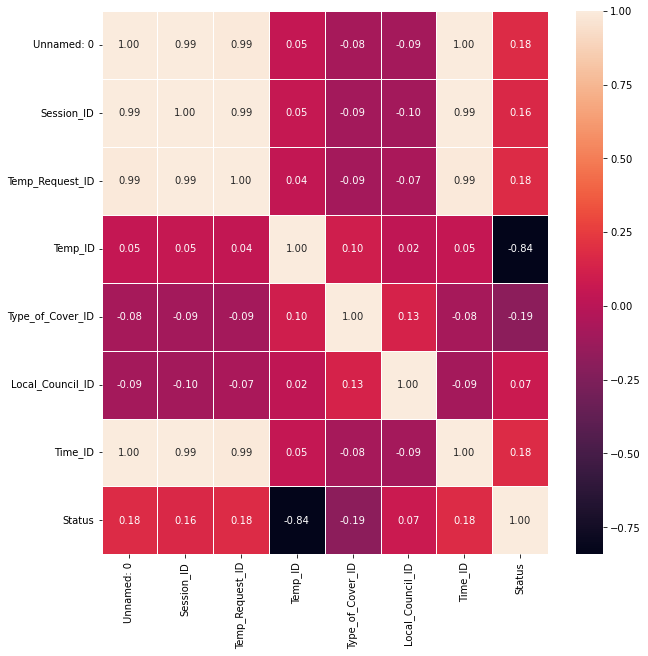

In [20]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [22]:
display(df1.Local_Council_ID.unique())
display(df1.Status.unique())
display(df1.Local_Council_ID.count())

array([ 4, 29, 48, 50, 54, 41,  7, 33,  2, 45, 34, 14, 52, 27, 53, 25, 31,
       36, 38, 18,  5, 26,  3, 24,  8], dtype=int64)

array([0, 1], dtype=int64)

357

In [24]:
df1.corr()

,Unnamed: 0,Session_ID,Temp_Request_ID,Temp_ID,Type_of_Cover_ID,Local_Council_ID,Time_ID,Status
Unnamed: 0,1.000000,0.993000,0.986566,0.047293,-0.084979,-0.093640,1.000000,0.176010
Session_ID,0.993000,1.000000,0.994220,0.053858,-0.094499,-0.096864,0.993000,0.160952
Temp_Request_ID,0.986566,0.994220,1.000000,0.036668,-0.087506,-0.069649,0.986566,0.175452
Temp_ID,0.047293,0.053858,0.036668,1.000000,0.101260,0.023694,0.047293,-0.842366
Type_of_Cover_ID,-0.084979,-0.094499,-0.087506,0.101260,1.000000,0.129866,-0.084979,-0.187624
Local_Council_ID,-0.093640,-0.096864,-0.069649,0.023694,0.129866,1.000000,-0.093640,0.071832
Time_ID,1.000000,0.993000,0.986566,0.047293,-0.084979,-0.093640,1.000000,0.176010
Status,0.176010,0.160952,0.175452,-0.842366,-0.187624,0.071832,0.176010,1.000000


In [26]:
df1.describe()

,Unnamed: 0,Session_ID,Temp_Request_ID,Temp_ID,Type_of_Cover_ID,Local_Council_ID,Time_ID,Status
count,357.00000,357.000000,3.570000e+02,355.000000,357.000000,357.000000,357.00000,357.000000
mean,178.00000,459.829132,2.752698e+06,68.498592,1.313725,23.375350,182.00000,0.635854
std,103.20126,126.575427,3.391711e+01,103.724466,0.969859,17.350137,103.20126,0.481865
min,0.00000,252.000000,2.752644e+06,0.000000,0.000000,2.000000,4.00000,0.000000
25%,89.00000,342.000000,2.752661e+06,0.000000,1.000000,4.000000,93.00000,0.000000
50%,178.00000,464.000000,2.752704e+06,0.000000,1.000000,26.000000,182.00000,1.000000
75%,267.00000,553.000000,2.752721e+06,177.000000,1.000000,36.000000,271.00000,1.000000
max,356.00000,714.000000,2.752764e+06,260.000000,6.000000,54.000000,360.00000,1.000000


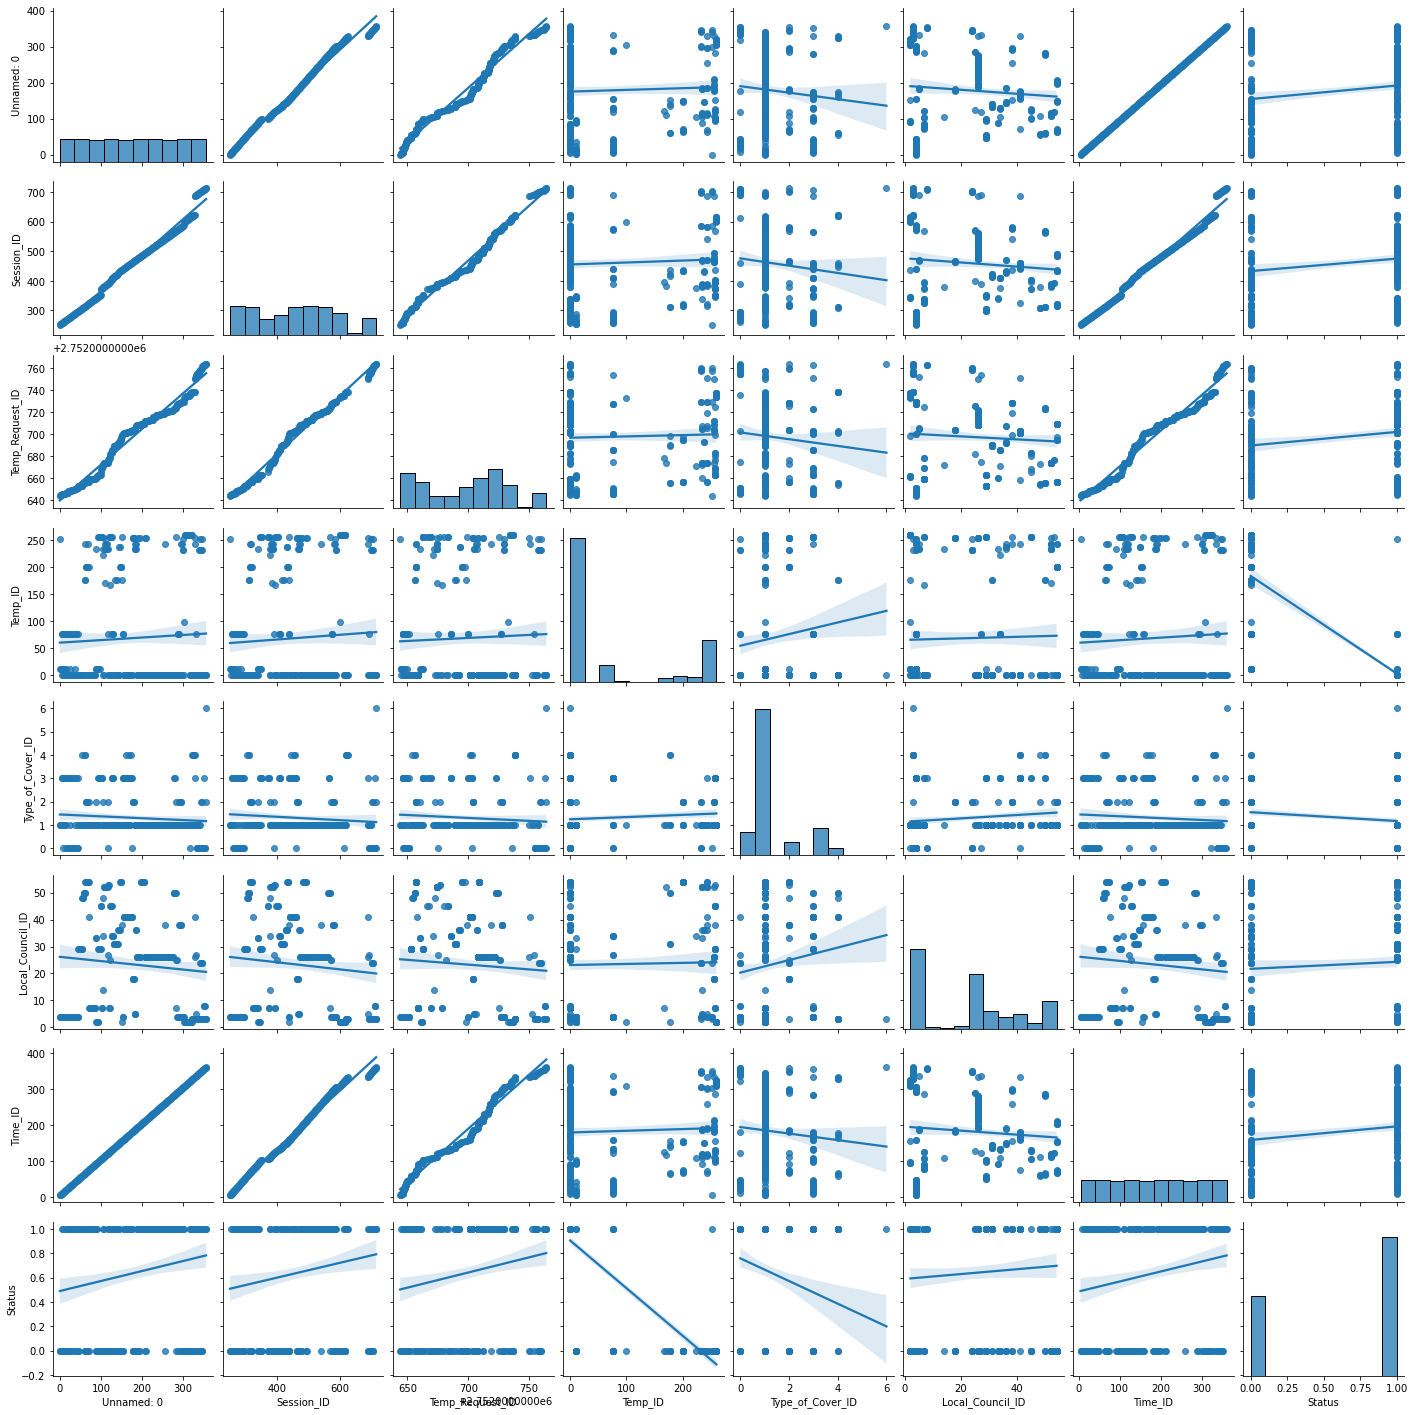

In [28]:
#f,ax = plt.subplots(figsize=(4, 4))
sns.pairplot(df1,kind="reg")

Text(0, 0.5, 'Count')

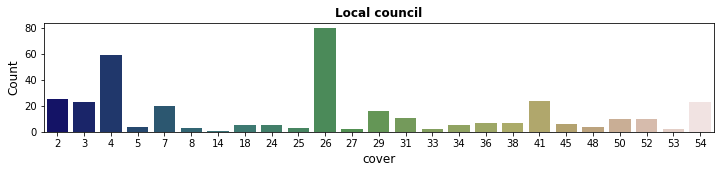

In [29]:
plt.figure(figsize=(12,2))
sns.countplot(x='Local_Council_ID', data = df1, palette='gist_earth')
plt.title('Local council', weight='bold')
plt.xlabel('cover', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


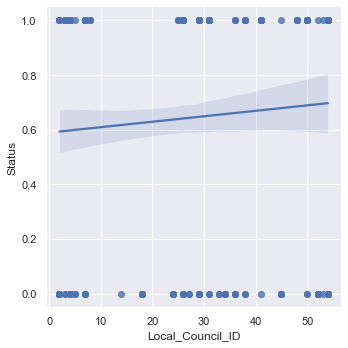

In [43]:
sns.lmplot(x="Local_Council_ID", y="Status", data=df1)

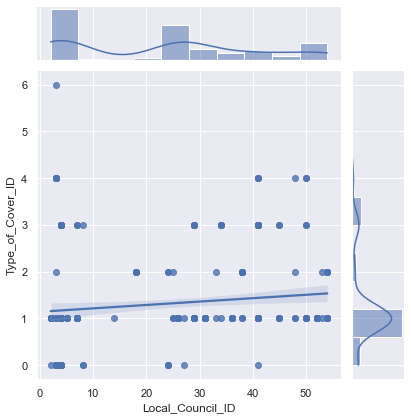

In [44]:
sns.jointplot(x="Local_Council_ID", y="Type_of_Cover_ID", 
              kind="reg", # Options are "scatter", "reg", "resid", "kde", "hex"
              data=df1)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Session_ID'}>,
        <AxesSubplot:title={'center':'Temp_Request_ID'}>],
       [<AxesSubplot:title={'center':'Temp_ID'}>,
        <AxesSubplot:title={'center':'Type_of_Cover_ID'}>,
        <AxesSubplot:title={'center':'Local_Council_ID'}>],
       [<AxesSubplot:title={'center':'Time_ID'}>,
        <AxesSubplot:title={'center':'Status'}>, <AxesSubplot:>]],
      dtype=object)

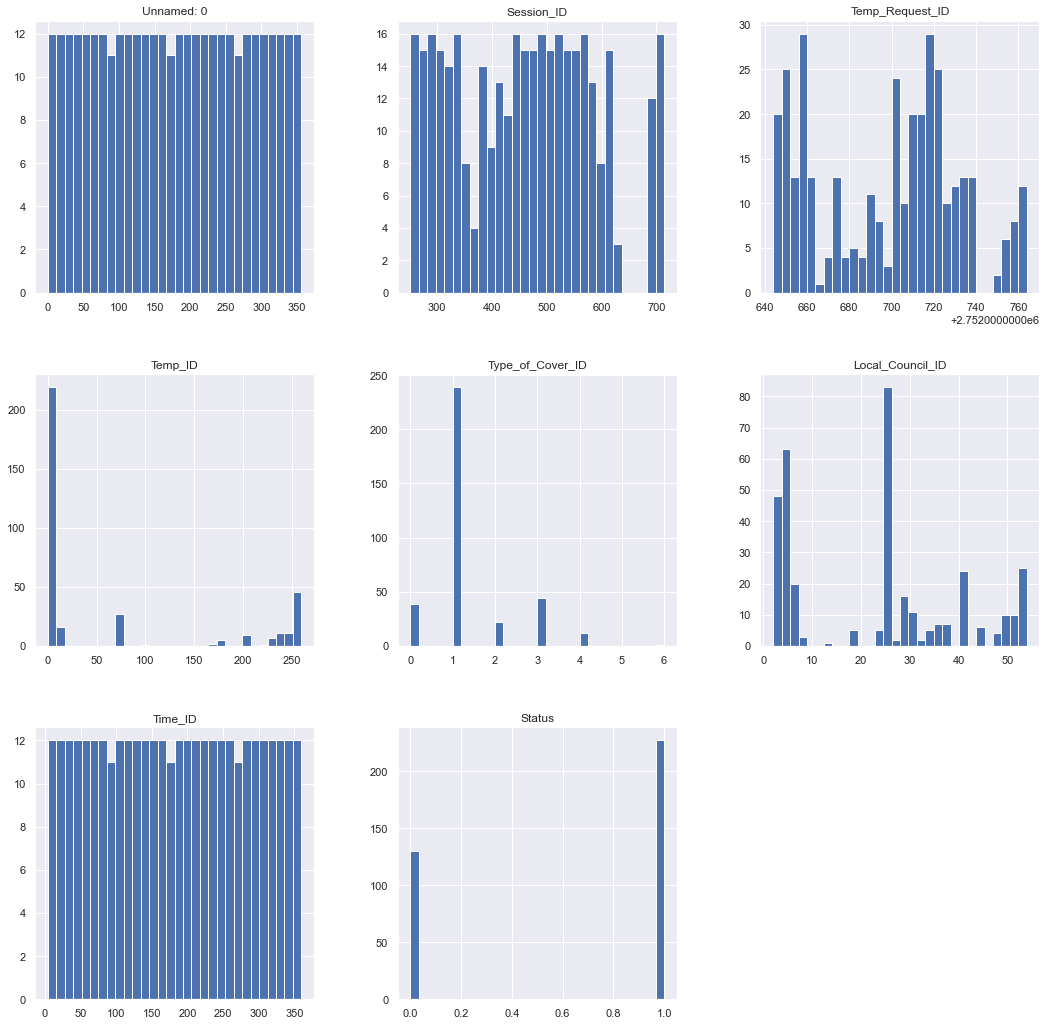

In [45]:
df1.hist(bins=30, figsize=(18,18))

In [49]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression Object
lm1 = LinearRegression()
X1 = df1[['Status']]
Y1 = df1[['Type_of_Cover_ID']] # Target

# Fit (Train) the model
lm1.fit(X1,Y1)

print("Intercept for the model is", lm1.intercept_, "and the scope is",lm1.coef_)

# Prediction
Yout1 = lm1.predict(X1)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout1[0:5])
print("Actual Values:",Y1.values[0:5])

Intercept for the model is [1.55384615] and the scope is [[-0.3776347]]
Predicted Values: [[1.55384615]
 [1.55384615]
 [1.55384615]
 [1.55384615]
 [1.17621145]]
Actual Values: [[1]
 [1]
 [1]
 [1]
 [1]]


In [54]:
lm2 = LinearRegression()
X2 = df1[['Status', 'Temp_Request_ID']]
Y2 = df1[['Type_of_Cover_ID']]

# Fit (Train) the model
lm2.fit(X2,Y2)

print("Intercept for the model is", lm2.intercept_, "and the scope is",lm2.coef_)

# Prediction
Yout2 = lm2.predict(X2)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout2[0:5])
print("Actual Values:",Y2.values[0:5])

Intercept for the model is [4434.73734987] and the scope is [[-0.35774581 -0.00161049]]
Predicted Values: [[1.62745801]
 [1.62584751]
 [1.62584751]
 [1.62584751]
 [1.2681017 ]]
Actual Values: [[1]
 [1]
 [1]
 [1]
 [1]]


In [62]:

# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')
series = df1;
series.Session_Date.index = series.Session_Date.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

C:\Users\praka\AppData\Local\Temp/ipykernel_18076/1514026535.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


TypeError: unsupported Type RangeIndex